https://www.youtube.com/watch?v=q1FttL_G1G4

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load dataset
athletes = pd.read_csv("../kaggle/data/olympic/athlete_events.csv")
regions = pd.read_csv("../kaggle/data/olympic/noc_regions.csv")


In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
# Join the dataframe
athletes_df = athletes.merge(regions, how = 'right', on = 'NOC')
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,502.0,Ahmad Shah Abouwi,M,NaN,NaN,NaN,Afghanistan,AFG,1956 Summer,1956.0,Summer,Melbourne,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
1,1076.0,Jammal-ud-Din Affendi,M,28.0,NaN,NaN,Afghanistan,AFG,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,NaN,Afghanistan,NaN
2,1101.0,Mohammad Anwar Afzal,M,NaN,NaN,NaN,Afghanistan,AFG,1948 Summer,1948.0,Summer,London,Football,Football Men's Football,NaN,Afghanistan,NaN
3,1745.0,Mohammad Aktar,M,17.0,156.0,48.0,Afghanistan,AFG,1980 Summer,1980.0,Summer,Moskva,Wrestling,"Wrestling Men's Light-Flyweight, Freestyle",NaN,Afghanistan,NaN
4,4628.0,Mohammad Daoud Anwary,M,22.0,NaN,NaN,Afghanistan,AFG,1964 Summer,1964.0,Summer,Tokyo,Wrestling,"Wrestling Men's Bantamweight, Freestyle",NaN,Afghanistan,NaN


In [7]:
athletes_df.shape 

(270768, 17)

In [8]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [9]:
# column name consistent
athletes_df.rename(columns = {'region':"Region", 'notes': "Notes"}, inplace = True)
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

In [10]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270768 entries, 0 to 270767
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  float64
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270768 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  float64
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  Region  270747 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(5), object(12)
memory usage: 37.2+ MB


In [11]:
athletes_df.describe(exclude = [np.object])

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
# check null values
nan_values = athletes_df.isna()    # check na for each cell
nan_columns = nan_values.any()
nan_columns
nan_columns[nan_columns == True]

ID         True
Name       True
Sex        True
Age        True
Height     True
Weight     True
Team       True
NOC       False
Games      True
Year       True
Season     True
City       True
Sport      True
Event      True
Medal      True
Region     True
Notes      True
dtype: bool

ID        True
Name      True
Sex       True
Age       True
Height    True
Weight    True
Team      True
Games     True
Year      True
Season    True
City      True
Sport     True
Event     True
Medal     True
Region    True
Notes     True
dtype: bool

In [13]:
null_count_all = athletes_df.isnull().sum()
null_count = null_count_all[null_count_all > 0]
null_columns = list(null_count.index)
null_columns

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal',
 'Region',
 'Notes']

In [14]:
# China details
athletes_df.query('Team == "China"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
43970,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
43971,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
43972,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
43973,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
43974,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [15]:
# Japan details
athletes_df.query('Team == "United States"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
247057,6.0,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
247058,6.0,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
247059,6.0,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
247060,6.0,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992.0,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
247061,6.0,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994.0,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [16]:
# Top countries participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending= False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

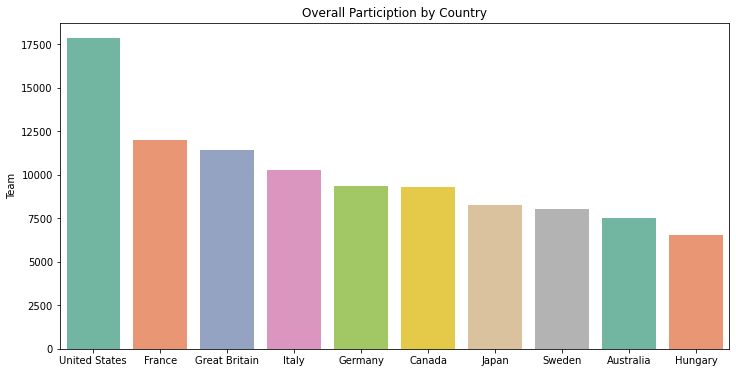

In [17]:
# plot for the top 10 countries

plt.figure(figsize= (12,6) )
#plt.xticks(rotation = 20)
plt.title("Overall Particiption by Country")
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette= 'Set2');

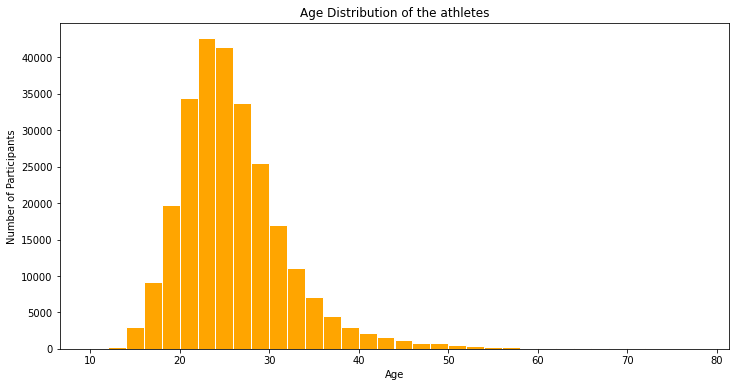

In [18]:
# Age distribution of the participants

plt.figure(figsize=(12,6))
plt.title("Age Distribution of the athletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = 'orange', edgecolor = 'white');

In [19]:
athletes_df.Season.unique()

array(['Summer', 'Winter', nan], dtype=object)

In [20]:
# Winter Olympics sports
winter_sports = athletes_df[athletes_df.Season == "Winter"].Sport.unique()
winter_sports
len(winter_sports)

array(['Luge', 'Bobsleigh', 'Alpine Skiing', 'Cross Country Skiing',
       'Snowboarding', 'Biathlon', 'Freestyle Skiing', 'Skeleton',
       'Figure Skating', 'Ice Hockey', 'Short Track Speed Skating',
       'Speed Skating', 'Alpinism', 'Nordic Combined', 'Ski Jumping',
       'Curling', 'Military Ski Patrol'], dtype=object)

17

In [21]:
# Summper Olympics sports
summer_sports = athletes_df[athletes_df.Season == "Summer"].Sport.unique()
summer_sports
len(summer_sports)

array(['Hockey', 'Football', 'Wrestling', 'Athletics', 'Taekwondo',
       'Judo', 'Boxing', 'Weightlifting', 'Shooting', 'Fencing',
       'Swimming', 'Sailing', 'Synchronized Swimming', 'Triathlon',
       'Equestrianism', 'Cycling', 'Volleyball', 'Handball', 'Rowing',
       'Table Tennis', 'Tennis', 'Gymnastics', 'Trampolining',
       'Badminton', 'Canoeing', 'Beach Volleyball', 'Basketball',
       'Diving', 'Rugby', 'Rugby Sevens', 'Polo', 'Modern Pentathlon',
       'Archery', 'Water Polo', 'Art Competitions', 'Golf',
       'Figure Skating', 'Softball', 'Baseball', 'Rhythmic Gymnastics',
       'Tug-Of-War', 'Ice Hockey', 'Lacrosse', 'Basque Pelota', 'Cricket',
       'Croquet', 'Motorboating', 'Racquets', 'Jeu De Paume', 'Alpinism',
       'Aeronautics', 'Roque'], dtype=object)

52

In [22]:
# Male and Female participants
gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196374
F     74393
Name: Sex, dtype: int64

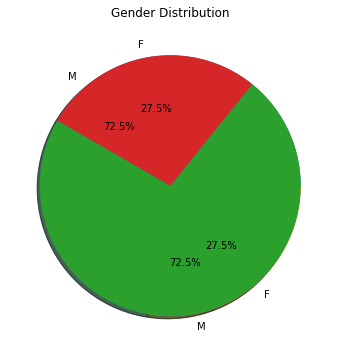

In [23]:
# Pie plot for male and female athletes

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct="%1.1f%%", shadow= True);plt.pie(gender_counts, labels = gender_counts.index, autopct="%1.1f%%", startangle= 150, shadow= True)
plt.show();

In [24]:
# Total medals
athletes_df.Medal.value_counts()


Gold      13371
Bronze    13291
Silver    13112
Name: Medal, dtype: int64

In [25]:
# Total number of female athletes in each olympics

female_participants = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == "Summer")][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000.0,5418
24,2004.0,5531
25,2008.0,5793
26,2012.0,5791
27,2016.0,6203


In [26]:
womenOlympics = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == "Summer")]
womenOlympics.shape

(59314, 17)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Year', ylabel='count'>

Text(0.5, 1.0, 'Women Participation')

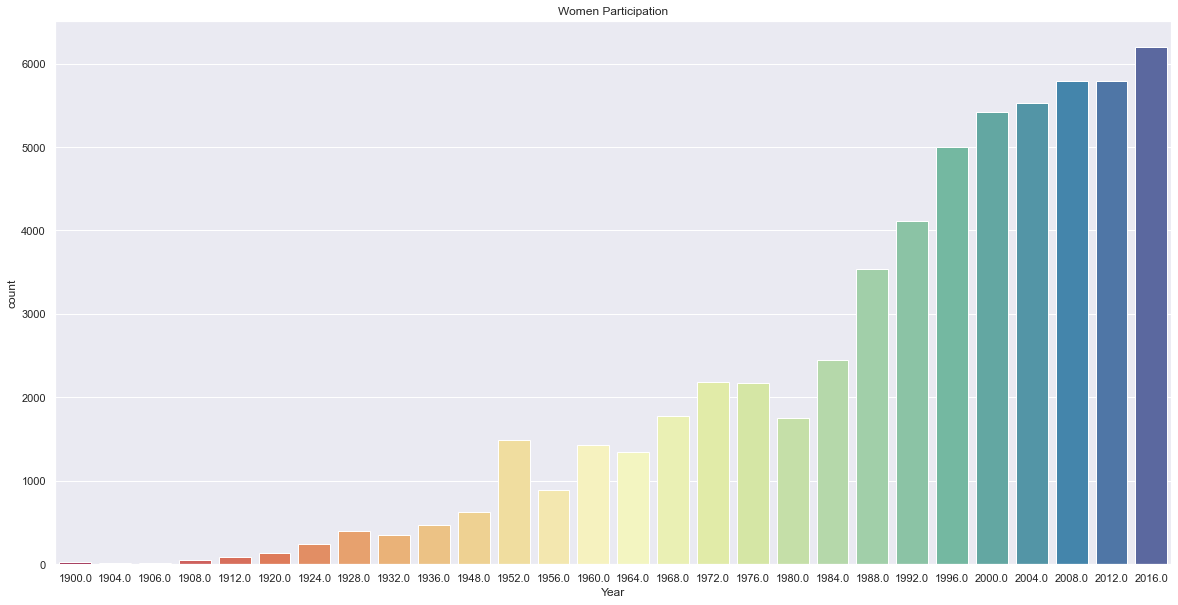

In [27]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,10))
sns.countplot(x = 'Year', data=womenOlympics, palette='Spectral')
plt.title("Women Participation")

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Year'>

Text(0.5, 1.0, 'Plot of Female Athletes over time')

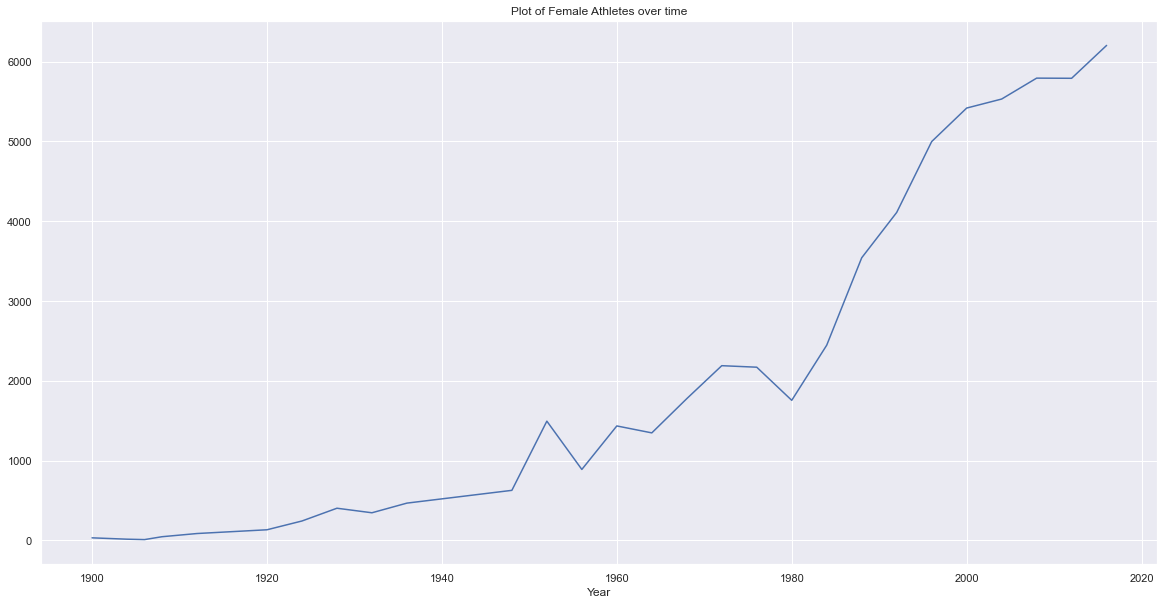

In [28]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize= (20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [31]:
athletes_df.Medal.unique()

array([nan, 'Bronze', 'Silver', 'Gold'], dtype=object)

In [34]:
# Gold medal athletes

goldMedals_df = athletes_df[athletes_df.Medal == "Gold"]
goldMedals_df.head()
goldMedals_df.shape

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
449,14046.0,Hassiba Boulmerka,F,24.0,158.0,49.0,Algeria,ALG,1992 Summer,1992.0,Summer,Barcelona,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
666,73857.0,Taoufik Makhloufi,M,24.0,170.0,67.0,Algeria,ALG,2012 Summer,2012.0,Summer,London,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
690,78805.0,Nouria Mrah-Benida,F,29.0,162.0,54.0,Algeria,ALG,2000 Summer,2000.0,Summer,Sydney,Athletics,"Athletics Women's 1,500 metres",Gold,Algeria,NaN
708,81861.0,Noureddine Morceli,M,26.0,175.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Athletics,"Athletics Men's 1,500 metres",Gold,Algeria,NaN
784,112998.0,Hocine Soltani,M,23.0,165.0,60.0,Algeria,ALG,1996 Summer,1996.0,Summer,Atlanta,Boxing,Boxing Men's Lightweight,Gold,Algeria,NaN


(13371, 17)

In [33]:
goldMedals_df.isnull().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
Region        0
Notes     13200
dtype: int64

In [35]:
# take only the values that Age is different from NaN
goldMedals_df = goldMedals_df[np.isfinite(goldMedals_df['Age'])]
goldMedals_df.shape

(13223, 17)

In [38]:
# Gold Medal winner over 60 years old
goldMedals_60 = goldMedals_df[goldMedals_df.Age > 60]
goldMedals_60.shape
goldMedals_60.head(10)

(6, 17)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
174327,52626.0,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
227701,117046.0,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912.0,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
255054,53238.0,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904.0,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
260452,95906.0,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
262912,113773.0,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
265282,130662.0,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


In [40]:
goldMedals_df['ID'][goldMedals_df['Age'] > 60].count()

6

In [44]:
sporting_event = goldMedals_df['Sport'][goldMedals_df['Age'] > 60]
list(sporting_event.values)

['Art Competitions', 'Shooting', 'Roque', 'Archery', 'Archery', 'Archery']

<Figure size 720x360 with 0 Axes>

C:\work2\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sport', ylabel='count'>

Text(0.5, 1.0, 'Gold Medals for Athletes over 60 years old')

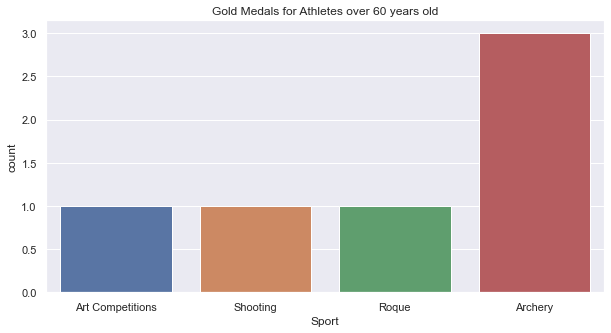

In [45]:
# plot for the sporting event

plt.figure(figsize = (10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for Athletes over 60 years old')

In [47]:
# Gold Medal for each country
goldMedals.Region.value_counts().reset_index(name = 'Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'UK'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Hungary'),
  Text(9, 0, 'Norway')])

Text(0.5, 1.0, 'Gold Medals per Country')

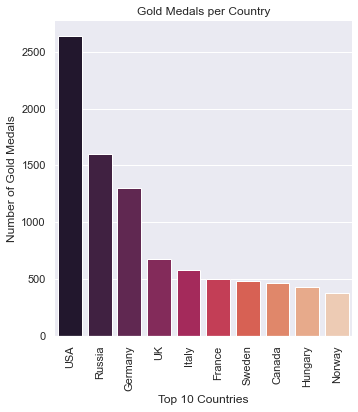

In [51]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name = 'Medal').head(10)
g = sns.catplot(x = 'index', y = 'Medal', data = totalGoldMedals,
               height= 5, kind = 'bar', palette= "rocket")
g.despine(left=True)
plt.xticks(rotation = 90)
g.set_xlabels('Top 10 Countries')
g.set_ylabels('Number of Gold Medals')
plt.title("Gold Medals per Country")

In [54]:
# Rio Olympics
max_year = athletes_df.Year.max()

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == "Gold")].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64